# Проект 8 спринта

- Автор: Марков Максим
- Дата: 27.07.2025

### Цели и задачи проекта

  Основная цель проекта сделать анализ рынка общественного питания в Москве, а также проведения исследовательского анализа рынка Москвы для определения подходящего инвесторам места.

### Описание данных

В проекте будут использованы данные из двух файлов.

Файл `/datasets/rest_info.csv` содержит информацию о заведениях общественного питания:
- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
    - `0` — заведение не является сетевым;
    - `1` — заведение является сетевым.
- `seats` — количество посадочных мест.

Файл `/datasets/rest_price.csv` содержит информацию о среднем чеке в заведениях общественного питания:
- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
    - «Средний счёт: 1000–1500 ₽»;
    - «Цена чашки капучино: 130–220 ₽»;
    - «Цена бокала пива: 400–600 ₽» и так далее.
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

### Содержимое проекта


1. [Загрузка и знакомство с данными](#1-bullet)<br>
2. [Предобработка данных](#2-bullet)<br>
3. [Исследовательский анализ данных](#3-bullet)<br>
4. [Категоризация данных](#4-bullet)


## Загрузка данных и знакомство с ними


In [1]:
#pip install matplotlib==3.7.3

In [2]:
#!pip install phik -U

In [3]:
#импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from phik import phik_matrix

In [4]:
#считываем файлы
df_rest = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
df_rest_price= pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

In [5]:
#знакомимся с данными файла rest_info
df_rest.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [6]:
#вывыдим общую информацию о данных 
df_rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [7]:
#знакомимся с данными файла rest_price
df_rest_price.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [8]:
#выводим общую информацию о данных
df_rest_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


---

### Промежуточный вывод


Датасет `rest_info` содержит 9 столбцов и 8406 строк, в которых представлена информация о заведениях общественного питания Москвы.

После первичного анализа данных можно сделать следующие выводы:
- Названия колонок заданны коректно и дают представление о хранящейся в них информации, стиль написания колонок соответствует стандарту "snake case".
- В 2 колонках (`hours`, `seats`) есть пропуски в данных.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Датасет `rest_price` содержит 5 столбцов и 4058 строк, в которых представлена информация о среднем чеке в заведениях общественного питания.

После первичного анализа данных можно сделать следующие выводы:
- Названия колонок заданны коректно и дают представление о хранящейся в них информации, стиль написания колонок соответствует стандарту "snake case".
- Во всех колонках, кроме `id`, есть пропуски в данных. В колонке `middle_coffee_cup` пропусков очень много, порядка 80%.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию, типы данных корректны.

### Подготовка единого датафрейма


In [9]:
#объединяем два датафрейма в один по столбцу id
df = df_rest.merge(df_rest_price, on='id', how='left')
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


In [10]:
#выводим общую информацию нового датафрейма
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


In [11]:
#выводим статистические показатели числовых столбцов
df.describe()

,rating,chain,seats,middle_avg_bill,middle_coffee_cup
count,8406.000000,8406.000000,4795.000000,3149.000000,535.000000
mean,4.229895,0.381275,108.421689,958.053668,174.721495
std,0.470348,0.485729,122.833396,1009.732845,88.951103
min,1.000000,0.000000,0.000000,0.000000,60.000000
25%,4.100000,0.000000,40.000000,375.000000,124.500000
50%,4.300000,0.000000,75.000000,750.000000,169.000000
75%,4.400000,1.000000,140.000000,1250.000000,225.000000
max,5.000000,1.000000,1288.000000,35000.000000,1568.000000


## Предобработка данных


In [12]:
#оптимизируем столбцы с данными типа float
for column in ['rating', 'seats', 'middle_avg_bill', 'middle_coffee_cup']:
    df[column] = pd.to_numeric(df[column], downcast = 'float')

#оптимизируем столбцы с данными типа int    
df['chain'] = pd.to_numeric(df['chain'], downcast = 'integer')

In [13]:
#проверяем новые типы данных
df.dtypes

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float32
chain                   int8
seats                float32
price                 object
avg_bill              object
middle_avg_bill      float32
middle_coffee_cup    float32
dtype: object

In [14]:
#считаем количество пропусков в каждом столбце
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [15]:
#осчитаем долю пропусков в каждом столбце
df.isna().sum()/df.shape[0]

id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
hours                0.063764
rating               0.000000
chain                0.000000
seats                0.429574
price                0.605639
avg_bill             0.546039
middle_avg_bill      0.625387
middle_coffee_cup    0.936355
dtype: float64

In [16]:
#удалим строки с пропущенными часами работы, так как таких строк несущественное количество
#df = df.dropna(subset = ['hours'])

In [17]:
#заменим пропуски в столбце с количеством мест на значение-индикатор -1
df['seats'] = df['seats'].fillna(-1)

In [18]:
#удалим строки с пропущенными значениями в столбце со средним чеком, так как таких значений меньше 10%, и у таких строк также \
#отсутствуют значения в столбцах middle_avg_bill и middle_coffee_cup
#df = df.dropna(subset = ['avg_bill'])

In [19]:
#выведем названия ценовых категорий
df['price'].unique()

array([nan, 'выше среднего', 'средние', 'высокие', 'низкие'], dtype=object)

In [20]:
#выыдем медианные значения для среднего чека и цены за чашку кофе в разрезе ценовых категорий 
df.groupby('price').agg({
    'middle_avg_bill': 'median',
    'middle_coffee_cup': 'median'
}).sort_values(by = 'middle_avg_bill', ascending = False)

,middle_avg_bill,middle_coffee_cup
price,,
высокие,2000.0,250.0
выше среднего,1250.0,203.0
средние,500.0,200.0
низкие,180.0,139.0


In [21]:
df.groupby('price').agg({
    'middle_avg_bill': 'mean',
    'middle_coffee_cup': 'mean'
}).sort_values(by = 'middle_avg_bill', ascending = False)

,middle_avg_bill,middle_coffee_cup
price,,
высокие,2472.631592,250.000000
выше среднего,1344.189209,203.000000
средние,598.908264,209.403671
низкие,217.311829,136.614029


In [22]:
#удаляем строки, где сразу три столбца price, middle_coffee_cup и middle_avg_bill с пропусками, так как для таких строк невозможно оценить ценовую политику
#df = df[df['price'].notna() | df['middle_coffee_cup'].notna() | df['middle_avg_bill'].notna()]

In [23]:
#определяем функцию, которая заменит пропуски в столбце middle_avg_bill, на основе средних значений в разрезе категории цены и чека на кофе
#def avg_bill(x):
   # if pd.isna(x['middle_avg_bill']):
    #    if (x['price'] == 'низкие') | (x['middle_coffee_cup'] <= 150):
     #       return 180
     #   elif (x['price'] == 'средние') | ((x['middle_coffee_cup'] > 150) & (x['middle_coffee_cup'] <= 200)):   
     #       return 500
      #  elif (x['price'] == 'выше среднего') | (x['middle_coffee_cup'] > 200) & (x['middle_coffee_cup'] < 250):
     #       return 1250
      #  else:
      #      return 2000
   # else:
    #    return x['middle_avg_bill']
#df['middle_avg_bill'] = df.apply(avg_bill, axis =1)

In [24]:
#объявляем функцию, которая заменяет пропуски в столбце price, на основе средних значений для middle_avg_bill и |
#middle_coffee_cup. Каждое пороговое значение - это среднее из таблицы выше + среднее отклонение 
#def fill_price(x):
   # if pd.isna(x['price']):
    #    if (x['middle_avg_bill'] <= (192)) | (x['middle_coffee_cup'] <= 150):
    #        return 'низкие'
     #   elif ((x['middle_avg_bill'] > (192))&(x['middle_avg_bill'] <= (557))) | ((x['middle_coffee_cup'] > 150) & (x['middle_coffee_cup'] <= 200)):   
     #       return 'средние'
     #   elif ((x['middle_avg_bill'] > (557))&(x['middle_avg_bill'] <= (1309))) | (x['middle_coffee_cup'] > 200) & (x['middle_coffee_cup'] < 250):
     #       return 'выше среднего'
     #   else:
     #       return 'высокие'
   # else:
  #      return x['price']
#df['price'] = df.apply(fill_price, axis =1)

In [25]:
#проверяем датафрейм на наличие явных дубликатов
df.duplicated().sum()

0

In [26]:
#выводим название адресов и их частоту
df['address'].value_counts()

Москва, проспект Вернадского, 86В       28
Москва, Усачёва улица, 26               26
Москва, площадь Киевского Вокзала, 2    20
Москва, Ярцевская улица, 19             20
Москва, Хорошёвское шоссе, 27           16
                                        ..
Москва, Бауманская улица, 56/17          1
Москва, ул. Ярославская, 8, корп. 1      1
Москва, 2-й Боткинский проезд, 8         1
Москва, Песочная аллея                   1
Москва, Кутузовский проспект, 36А        1
Name: address, Length: 5753, dtype: int64

In [27]:
#объявлем функцию, которая на выходе создает столбец с обозначением - круглосуточное ли заведение
def round_clock(x):
    if x['hours'] == 'ежедневно, круглосуточно': 
        return True
    else: 
        return False
df['is_24_7'] = df.apply(round_clock, axis =1)

---

### Промежуточный вывод


В ходе предобработки данных было выполнено: 1) были выявлены пропуски значений в столбцах seats(3611), price(5091), avg_bill(4590), hours(536), middle_avg_bill(5257) и middle_coffee_cup(7871). 2) пропуски в стобце seats были заменены на значение индикатор -1, 3) был создан новый столбец, показывающий - круглостуочно ли работае заведение.  

In [28]:
#убеждаемся в отсутсвии пропусков в нужных столбцах
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                   0
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
is_24_7                 0
dtype: int64

In [29]:
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,-1.0,NaN,NaN,NaN,NaN,False
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,False
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN,False
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,-1.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,False
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN,False


## Исследовательский анализ данных


---

### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

In [30]:
#выводим количество заведений по категориям
category_counts = df['category'].value_counts()
category_counts

кафе               2378
ресторан           2043
кофейня            1413
бар,паб             765
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

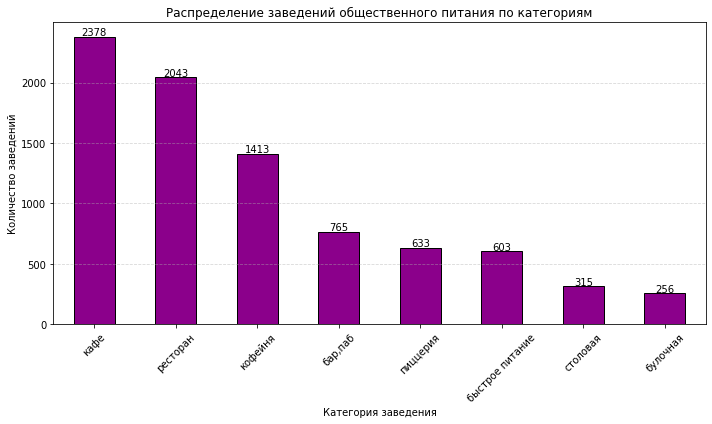

In [31]:
#строим график 
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='darkmagenta', edgecolor='black')
plt.title('Распределение заведений общественного питания по категориям')
plt.xlabel('Категория заведения')
plt.ylabel('Количество заведений')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

for i, count in enumerate(category_counts):
    plt.text(i, count + 10, str(count), ha='center')

plt.tight_layout()

Вывод: наибольшее количество заведений у категорий: ресторан (2378), кофейня(2043) и кафе(1413).

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

In [32]:
#выводим колечество заведений по административным районам
district_counts = df['district'].value_counts()
district_counts

Центральный административный округ         2242
Северный административный округ             900
Южный административный округ                892
Северо-Восточный административный округ     891
Западный административный округ             851
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64

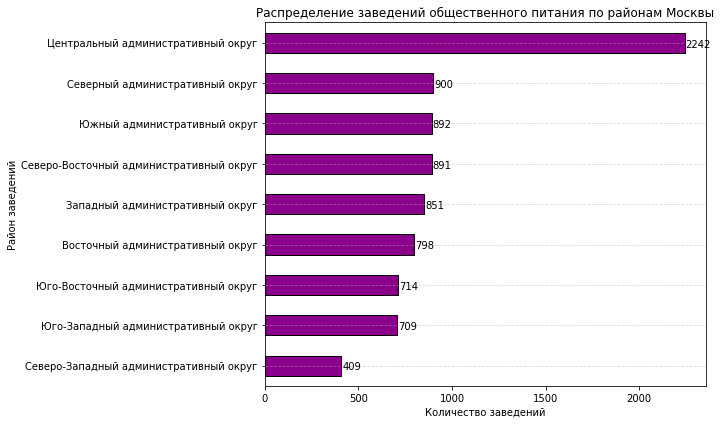

In [33]:
#строим график
plt.figure(figsize=(10, 6))
district_counts.sort_values().plot(kind='barh', color='darkmagenta', edgecolor='black')
plt.title('Распределение заведений общественного питания по районам Москвы')
plt.xlabel('Количество заведений')
plt.ylabel('Район заведений')
plt.grid(axis='y', linestyle='--', alpha=0.5)

for i, count in enumerate(district_counts.sort_values()):
    plt.text(count + 5, i - 0.1, str(count), color='black')

plt.tight_layout()

In [34]:
#фильтруем данные по ЦАО
central_count = df[(df['district'] == 'Центральный административный округ')]['category'].value_counts()

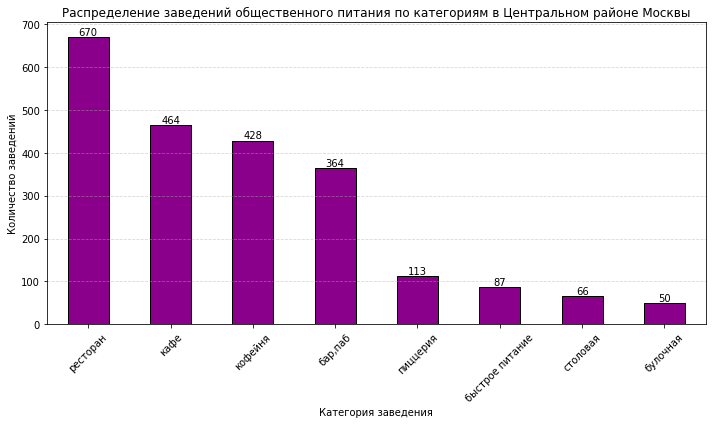

In [35]:
#строим график распределения заведений в ЦАО
plt.figure(figsize=(10, 6))
central_count.plot(kind='bar', color='darkmagenta', edgecolor='black')
plt.title('Распределение заведений общественного питания по категориям в Центральном районе Москвы')
plt.xlabel('Категория заведения')
plt.ylabel('Количество заведений')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

for i, count in enumerate(central_count):
    plt.text(i, count + 5, str(count), ha='center')

plt.tight_layout()

Вывод: наибольшее количество заведений Москвы находится в Центральном округе(2242). Из них самые популярные: ресторан(670),  кафе(464) и кофейня(428).

---

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

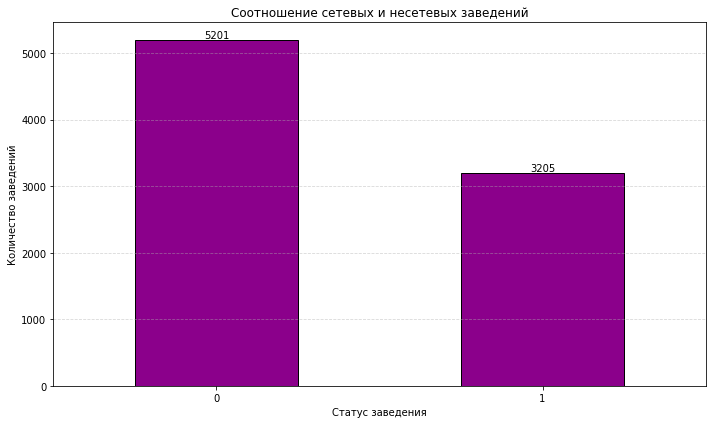

In [36]:
#Строим график соотношения сетевых и несетевых заведений
plt.figure(figsize = (10,6))
df['chain'].value_counts().plot(kind ='bar', rot =0, color='darkmagenta', edgecolor='black')
plt.title('Соотношение сетевых и несетевых заведений')
plt.xlabel('Статус заведения')
plt.ylabel('Количество заведений')
plt.grid(axis='y', linestyle='--', alpha=0.5)
for i, count in enumerate(df['chain'].value_counts()):
    plt.text(i, count + 20, str(count), ha='center')
plt.tight_layout()

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

<Figure size 720x432 with 0 Axes>

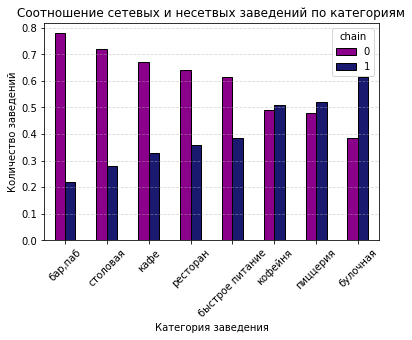

In [37]:
#Строим график соотношения сетевых и несетвых заведений по категориям
plt.figure(figsize = (10,6))
grouped_category = df.groupby('category')['chain'].value_counts(normalize=True).unstack(fill_value=0)
#grouped_category['total'] = grouped_category.sum(axis=1)
#grouped_category = grouped_category.sort_values(by = 'total', ascending = False).drop('total', axis=1)
grouped_category = grouped_category.sort_values(by = 0, ascending = False)
grouped_category.plot(kind ='bar', rot =45, color = ['darkmagenta', 'midnightblue'], edgecolor = 'black')
plt.xlabel('Категория заведения')
plt.ylabel('Количество заведений')
plt.title('Соотношение сетевых и несетвых заведений по категориям')
plt.grid(axis='y', linestyle='--', alpha=0.5)
    
plt.tight_layout

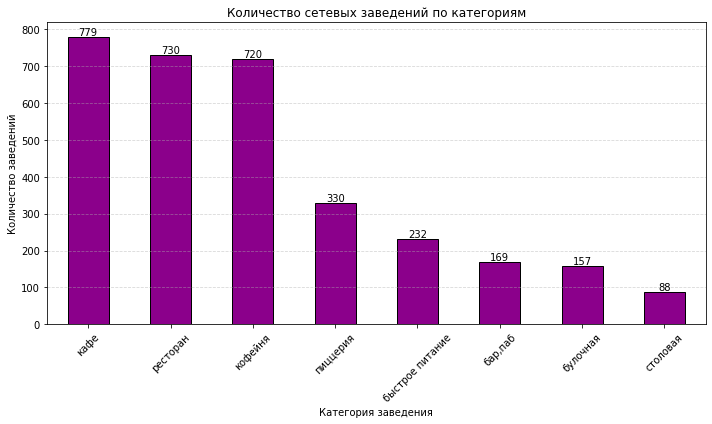

In [38]:
#Строим график количества сетевых заведений по категориям
true_chain = df[(df['chain'] == True)]['category'].value_counts()
plt.figure(figsize = (10,6))
true_chain.plot(kind ='bar', rot =45, color='darkmagenta', edgecolor='black')
plt.xlabel('Категория заведения')
plt.ylabel('Количество заведений')
plt.title('Количество сетевых заведений по категориям')
plt.grid(axis='y', linestyle='--', alpha=0.5)
for i, count in enumerate(true_chain):
    plt.text(i, count + 5, str(count), ha='center')
plt.tight_layout()

Вывод: несетевых заведений в Москве существенно больше (примерно в 1,6 раз). В большей части сетевыми являются кофейни (соотношения сетевых и несетевых крайне близко). Наибольший разброс наблюдается у баров и пабов. Наибольшее количество сетевых заведений - у кафе (779), а наименьшее - у столовых (88).

---

### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


In [39]:
#выводим количество мест и зведений с ними
df['seats'].value_counts()

-1.0      3611
 40.0      253
 100.0     213
 60.0      175
 50.0      168
          ... 
 185.0       1
 151.0       1
 268.0       1
 252.0       1
 760.0       1
Name: seats, Length: 230, dtype: int64

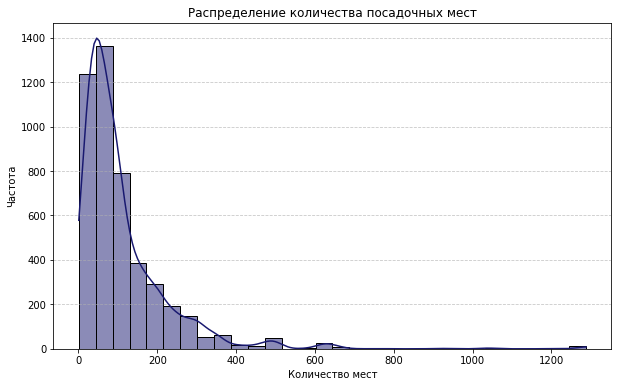

In [40]:
#Строим график распределения количества посадочных мест, убираея значения индикаторы
plt.figure(figsize=(10, 6))
sns.histplot(df[df['seats']>0]['seats'], bins=30, kde=True, color='midnightblue')
plt.title('Распределение количества посадочных мест')
plt.xlabel('Количество мест')
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--', alpha=0.7)

Text(0.5, 0, 'Количество мест')

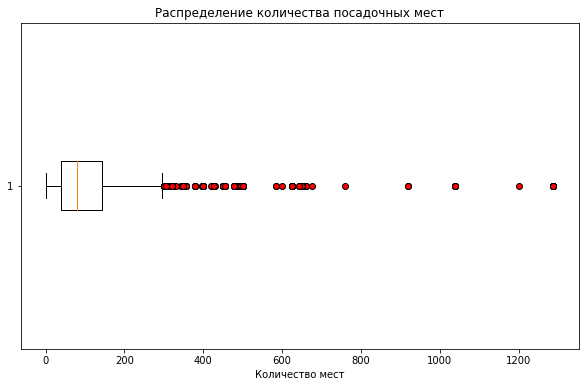

In [41]:
#Строим график распределения количества посадочных мест для оценки выбросов
plt.figure(figsize=(10, 6))
plt.boxplot(df[df['seats']>0]['seats'], vert= False, flierprops= dict(markerfacecolor= 'r', marker ='o'))
plt.title('Распределение количества посадочных мест')
plt.xlabel('Количество мест')


In [42]:
#получаем медиану
med = df[df['seats']>0]['seats'].quantile(0.5)
med

79.0

In [43]:
#получеам верхнюю границу количества мест
Q1 = df[df['seats']>0]['seats'].quantile(0.25)
Q3 = df[df['seats']>0]['seats'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
upper_bound

297.5

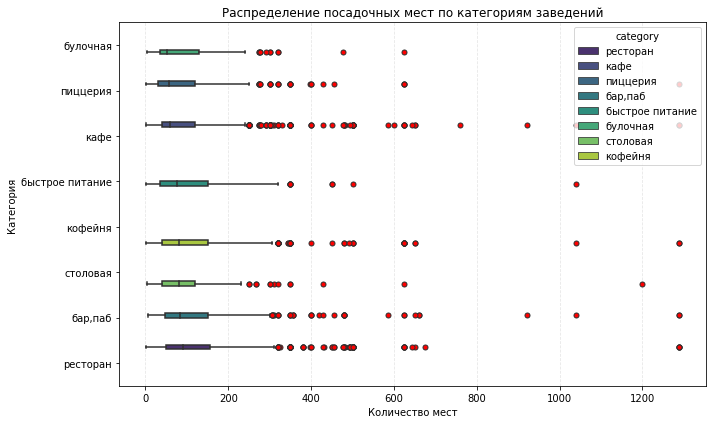

In [44]:
#Строим график распределения количества посадочных мест по категориям
df_filtered = df[df['seats'] > 0]
median_values = df_filtered.groupby('category')['seats'].median().sort_values()
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='seats',
    y='category',
    hue = 'category',
    data=df[df['seats'] > 0],
    order=median_values.index,
    palette='viridis',
    flierprops=dict(marker='o', markersize=5, markerfacecolor='r'),
)
plt.title('Распределение посадочных мест по категориям заведений')
plt.xlabel('Количество мест')
plt.ylabel('Категория')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()

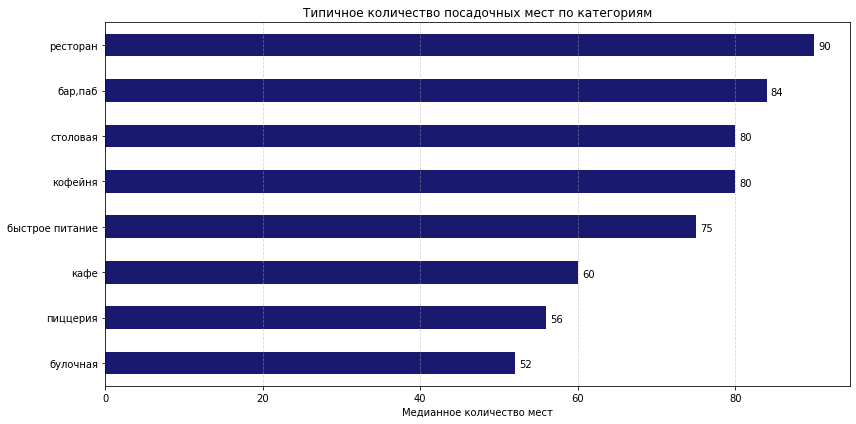

In [45]:
#строим график типичного (медианного) количества посадочных мест
typical_seats = df[df['seats'] > 0].groupby('category')['seats'].median().sort_values()

plt.figure(figsize=(12, 6))
typical_seats.plot(kind='barh', color='midnightblue')
plt.title('Типичное количество посадочных мест по категориям')
plt.xlabel('Медианное количество мест')
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Добавляем подписи значений
for i, v in enumerate(typical_seats):
    plt.text(v + 0.5, i - 0.1, f"{int(v)}", color='black')

plt.tight_layout()

Вывод: среднее количество посадочных мест по всем данным - 79 мест. Количество мест превышающее 297,5 считается выбросом. Наибольшее типичное количество мест у ресторанов - 90 мест, наименьшее у булочных - 52.

---

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

In [46]:
avg_ratings_by_category = df.groupby('category')['rating'].mean().reset_index()
#Присваиваем названия столбцам 
avg_ratings_by_category.columns = ['Category', 'Average Rating']
#Округляем средний рейтинг до двух знаков после запятой
avg_ratings_by_category['Average Rating'] = round(avg_ratings_by_category['Average Rating'],2)
avg_ratings_by_category

,Category,Average Rating
0,"бар,паб",4.39
1,булочная,4.27
2,быстрое питание,4.05
3,кафе,4.12
4,кофейня,4.28
5,пиццерия,4.30
6,ресторан,4.29
7,столовая,4.21


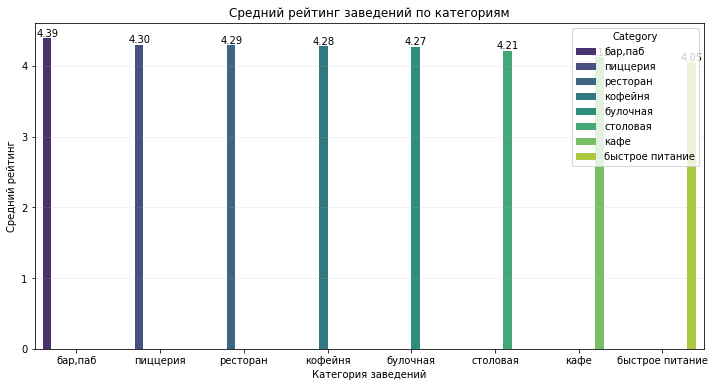

In [47]:
#Строим график средней оценки по категориям
#Сортируем категории по убыванию среднего рейтинга
sorted_avg_ratings_by_category = avg_ratings_by_category.sort_values(by='Average Rating', ascending=False)

#Визуализация средней оценки по категориям
plt.figure(figsize=(12, 6))
bars = sns.barplot(x='Category', y='Average Rating', data=sorted_avg_ratings_by_category, hue ='Category', palette='viridis') 

plt.title('Средний рейтинг заведений по категориям')
plt.xlabel('Категория заведений') 
plt.ylabel('Средний рейтинг')

plt.xticks(rotation=0, ha='center') 
for bar in bars.containers:
    bars.bar_label(bar, fmt='%.2f') 
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

Вывод:редние рейтинги примерны равны по значениям, минимальный средний рейтинг 4.05 имеют заведения быстрого питания, а максимальный средний рейтинг 4.39 имеют бары и пабы. 

---

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

interval columns not set, guessing: ['rating', 'chain', 'seats']


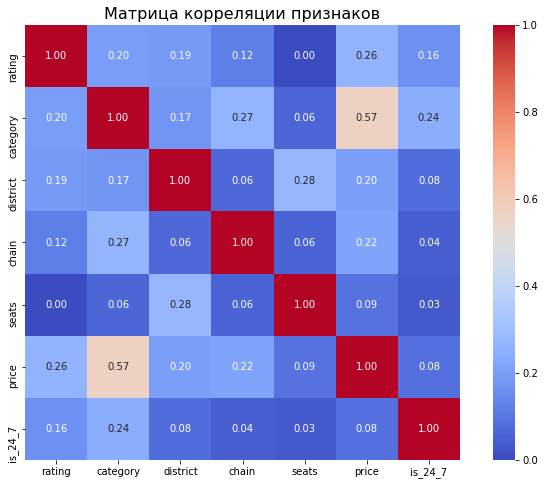

In [48]:
#Выделяем нужные столбцы
data_subset = df[['rating', 'category', 'district', 'chain', 'seats', 'price', 'is_24_7']]

#строим матрицу корреляции 
phi_k_matrix = data_subset.phik_matrix(interval_cols=None)
plt.figure(figsize=(12, 8))
sns.heatmap(phi_k_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Матрица корреляции признаков', fontsize=16)
plt.show()

Вывод: наилучшие связи показывают пары price-category, price-rating, category-chain.

In [49]:
#проверяем зависимость среднего и медианного рейтинга от ценовой категории
link_df = df.groupby('price')['rating'].agg(['median', 'mean']).sort_values(by = 'mean', ascending = False).round(2)
link_df

,median,mean
price,,
высокие,4.4,4.44
выше среднего,4.4,4.39
средние,4.3,4.30
низкие,4.2,4.17


Вывод: зависимость среднего рейтинга от ценовой категории подтвердилась - чем выше ценовая политика заведения, тем выше средний рейтинг

---

### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

In [50]:
#выделяем только сетевые заведения
ch_df = df[(df['chain'] == 1)]
#выделяем самые популярные и осредняем рейтинг
top_df = ch_df.groupby(['name', 'category']).agg({'address': 'count', 'rating': 'mean'})
top_df = top_df.sort_values(by ='address', ascending = False)
top_df['rating'] = top_df['rating'].round(2)
top_df = top_df.reset_index().head(15)
top_df

,name,category,address,rating
0,Шоколадница,кофейня,119,4.18
1,Домино'с Пицца,пиццерия,76,4.17
2,Додо Пицца,пиццерия,74,4.29
3,One Price Coffee,кофейня,71,4.06
4,Яндекс Лавка,ресторан,69,3.87
5,Cofix,кофейня,65,4.08
6,Prime,ресторан,49,4.11
7,КОФЕПОРТ,кофейня,42,4.15
8,Кулинарная лавка братьев Караваевых,кафе,39,4.39
9,Теремок,ресторан,36,4.11


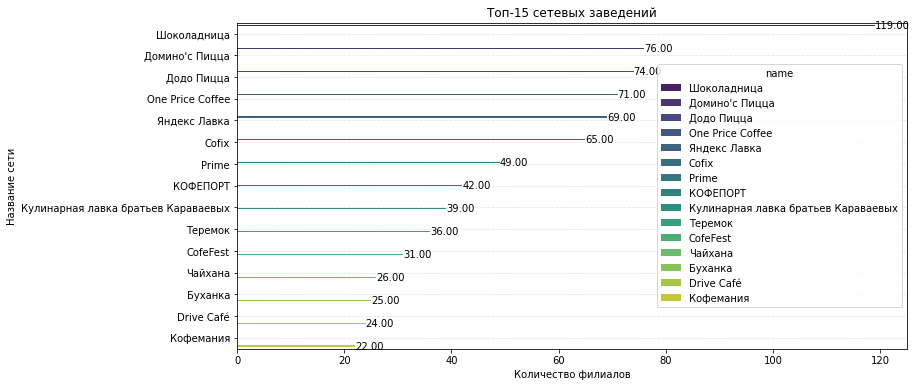

In [51]:
#строим график топ 15 сетей
plt.figure(figsize=(12, 6))
top_bar = sns.barplot(x='address', y='name', data=top_df, hue ='name', palette='viridis') 

plt.title('Топ-15 сетевых заведений')
plt.xlabel('Количество филиалов')
plt.ylabel('Название сети')

for bar in top_bar.containers:
    top_bar.bar_label(bar, fmt='%.2f') 
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

Вывод: самые популярные сетевые заведения - Шоколадница и Домино'с Пицца. В топ 15 находятся заведения с разнообразными категориями, но самые популярные это клфейни и пиццерии.

---

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


In [52]:
#выводим средний чек для каждого округа
bill_mean = df.groupby('district').agg({'middle_avg_bill': 'mean'}).reset_index()
bill_mean = bill_mean.round(2).sort_values(by = 'middle_avg_bill', ascending = True)
bill_mean = bill_mean.set_index('district')
bill_mean

,middle_avg_bill
district,
Юго-Восточный административный округ,654.099976
Северо-Восточный административный округ,716.609985
Юго-Западный административный округ,792.559998
Восточный административный округ,820.630005
Северо-Западный административный округ,822.219971
Южный административный округ,834.400024
Северный административный округ,927.960022
Западный административный округ,1053.229980
Центральный административный округ,1191.060059


<Figure size 864x576 with 0 Axes>

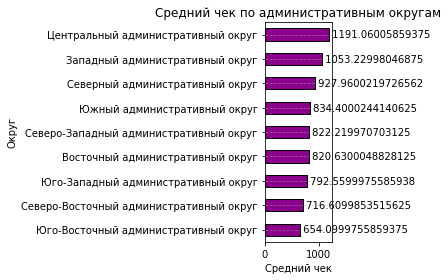

In [53]:
plt.figure(figsize = (12,8))
ax = bill_mean.plot(kind ='barh', rot =0, color='darkmagenta', edgecolor='black', legend = False)
for i, (value, name) in enumerate(zip(bill_mean['middle_avg_bill'], bill_mean.index)):
    ax.text(value, i, f' {value}', va='center', ha='left')
plt.xlabel('Средний чек')
plt.ylabel('Округ')
plt.title('Средний чек по административным округам')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

Вывод: самые дорогие чеки в центральнм округе, а дешевые - в юго-восточном

## Итоговый вывод и рекомендации


В ходе реализации проекта был выполнен аналитический обзор рынка общественного питания Москвы.

Исследование показало, что заведения премиум-сегмента чаще располагаются в Центральном и Западном округах столицы. Кроме того, именно в этих районах фиксируются самые высокие средние чеки, что, согласно анализу, способствует более высоким рейтингам таких заведений.

Это свидетельствует о наличии в Москве значительного числа платежеспособных жителей, ценящих качество обслуживания и готовых за него платить, чем и объясняется концентрация премиальных заведений в ЦАО и ЗАО.